<a href="https://colab.research.google.com/github/asegura4488/CienciaDatos/blob/main/Semana5/MinimosCuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
import seaborn as sns
import os
os.chdir('/content/drive/MyDrive/ColabNotebooks/Cursos/CursoCienciaDatos/Semana5')
!ls

Datos  MinimosCuadrados.ipynb  VentasDiasPredictor.ipynb


In [180]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [181]:
data = pd.read_csv('Datos/DatosRegresion.csv')
data

,X0,X1,Y
0,5.488135,6.207617,25.523276
1,7.151894,7.460697,32.167177
2,6.027634,10.499409,43.066154
3,5.448832,15.011900,38.069097
4,4.236548,6.670149,21.101511
...,...,...,...
495,2.716528,1.953527,5.693810
496,4.554441,10.298444,28.084859
497,4.017135,18.768240,51.312559
498,2.484135,4.572931,18.596668


In [182]:
#data['X0X1'] = data['X0']+data['X1']
#data

In [183]:
X = np.array(data[['X0','X1']])
Y = np.array(data['Y'])

In [220]:
Y = +7*X[:,0]**2 - -0.25*X[:,1]**2
#Y = np.exp(-np.random.uniform(-2,2,size=X.shape[0])**2)
#Y

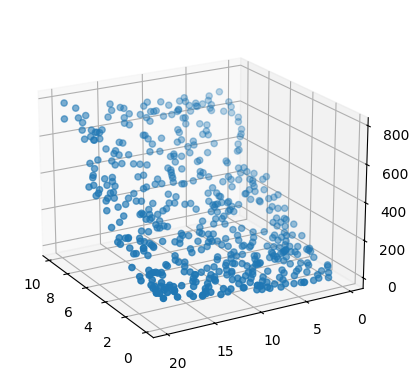

In [221]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d', elev=20, azim=150)
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [222]:
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [223]:
XTrain.shape

(400, 2)

In [224]:
# Modelo
Model = LinearRegression()
Model.fit(XTrain, YTrain)

LinearRegression()

In [225]:
Model.intercept_

np.float64(-138.77044703589343)

In [226]:
Model.coef_[0]

np.float64(71.30984731265602)

In [227]:
Model.coef_[1]

np.float64(5.092164235957399)

In [228]:
params = np.array([Model.intercept_, Model.coef_[0], Model.coef_[1]])
params

array([-138.77044704,   71.30984731,    5.09216424])

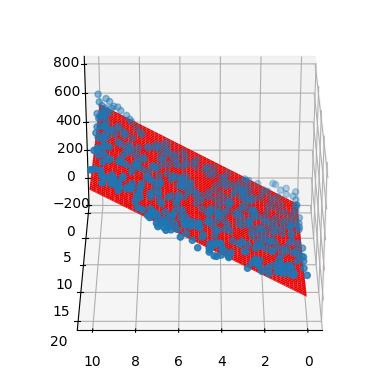

In [229]:
# Vamos a pintar el modelo
x0 = np.linspace(min(X[:,0]), max(X[:,0]), 100)
x1 = np.linspace(min(X[:,1]), max(X[:,1]), 100)
xx0, xx1 = np.meshgrid(x0, x1)

Ygrid = params[0] + params[1]*xx0 + params[2]*xx1

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d', elev=30, azim=90)
ax.scatter(X[:,0], X[:,1], Y)
ax.plot_surface(xx0, xx1, Ygrid,color='r')
plt.show()

In [230]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [231]:
mean_absolute_error(YTest, Model.predict(XTest))

46.12382838670004

In [232]:
mean_squared_error(YTest, Model.predict(XTest))

2929.5702992745623

In [233]:
# Vamos a contruir nuestro propio linearregressor

In [234]:
A = np.ones((X.shape[0],3))
A[:,1] = X[:,0]
A[:,2] = X[:,1]
A

array([[ 1.        ,  5.48813504,  6.20761652],
       [ 1.        ,  7.15189366,  7.46069728],
       [ 1.        ,  6.02763376, 10.49940885],
       ...,
       [ 1.        ,  4.01713535, 18.76824043],
       [ 1.        ,  2.48413465,  4.57293102],
       [ 1.        ,  5.05866384, 13.54282288]])

In [235]:
# Definamos el vector b
b = np.array(Y)

In [236]:
AT = np.dot(A.T,A)
AT

array([[  500.        ,  2482.98820732,  4952.45427279],
       [ 2482.98820732, 16578.03915643, 24491.15546764],
       [ 4952.45427279, 24491.15546764, 65842.1853623 ]])

In [237]:
bT = np.dot(A.T,b)
bT

array([ 132506.82043557,  957520.17012485, 1395775.34789278])

In [238]:
params1 = np.linalg.solve(AT,bT)
params1

array([-139.20798623,   70.63976346,    5.3939143 ])

In [239]:
params

array([-138.77044704,   71.30984731,    5.09216424])

In [241]:
Residuales = np.dot(A,params1) - b
sigma = np.dot(Residuales.T,Residuales)/(Residuales.shape[0]-params1.shape[0])
sigma

np.float64(2850.252048878327)

In [242]:
Cov = sigma*np.linalg.inv(np.dot(A.T,A))
Cov

array([[ 3.93131510e+01, -3.37344168e+00, -1.70220805e+00],
       [-3.37344168e+00,  6.71129006e-01,  4.10209449e-03],
       [-1.70220805e+00,  4.10209449e-03,  1.69798351e-01]])

<Axes: >

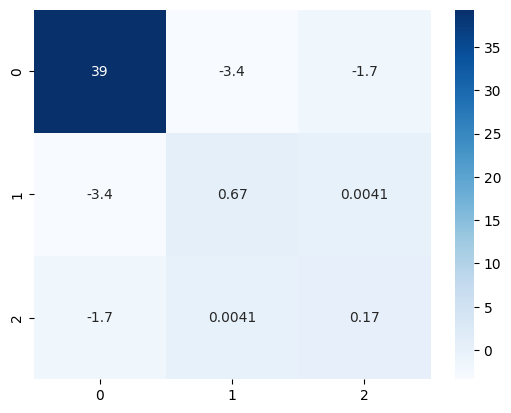

In [243]:
sns.heatmap(Cov,annot=True,cmap='Blues')

In [244]:
np.sqrt(Cov[0,0])

np.float64(6.270020012661934)

In [245]:
params1

array([-139.20798623,   70.63976346,    5.3939143 ])

In [246]:
np.sqrt(Cov[1,1])

np.float64(0.8192246368380177)

In [247]:
np.sqrt(Cov[2,2])

np.float64(0.4120659551529692)